In [1]:
import pandas as pd
import numpy as np
import re
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('./movies_images/train.csv')
df.shape

(7254, 27)

In [3]:
df.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
images_list = []
for i in range(0, df.shape[0]):
    img = image.load_img('./movies_images/Images/' + df['Id'][i] + '.jpg')
    img = image.img_to_array(img)
    img = img/255
    images_list.append(img)

In [5]:
def getMinSize(images_list):
    min_width = 100000;
    min_height = 100000;
    
    for i in range(0, len(images_list)):
        if (images_list[i].shape[0] < min_width):
            min_width = images_list[i].shape[0]
        if (images_list[i].shape[1] < min_height):
            min_height = images_list[i].shape[1]
            
    return min_width, min_height

In [6]:
size = getMinSize(images_list)
size

(132, 89)

In [7]:
images_list_resized = [image.smart_resize(img, size) for img in images_list]

In [8]:
X = np.array(images_list_resized)
X.shape

(7254, 132, 89, 3)

In [9]:
y = np.array(df.drop(['Id', 'Genre'],axis=1))
y.shape

(7254, 25)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [49]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=images_list_resized[0].shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(25, activation='sigmoid'))

In [50]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 128, 85, 16)       1216      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 64, 42, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 64, 42, 16)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 60, 38, 32)        12832     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 30, 19, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 30, 19, 32)       

In [51]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [20]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10
91/91 [==============================] - 15s 156ms/step - loss: 0.2792 - accuracy: 0.2144 - val_loss: 0.2816 - val_accuracy: 0.3363
Epoch 2/10
91/91 [==============================] - 14s 155ms/step - loss: 0.2476 - accuracy: 0.2573 - val_loss: 0.2682 - val_accuracy: 0.3522
Epoch 3/10
91/91 [==============================] - 14s 155ms/step - loss: 0.2426 - accuracy: 0.2793 - val_loss: 0.2522 - val_accuracy: 0.3136
Epoch 4/10
91/91 [==============================] - 14s 155ms/step - loss: 0.2396 - accuracy: 0.3031 - val_loss: 0.2500 - val_accuracy: 0.3081
Epoch 5/10
91/91 [==============================] - 14s 154ms/step - loss: 0.2371 - accuracy: 0.3164 - val_loss: 0.2426 - val_accuracy: 0.2646
Epoch 6/10
91/91 [==============================] - 14s 155ms/step - loss: 0.2360 - accuracy: 0.3164 - val_loss: 0.2408 - val_accuracy: 0.2867
Epoch 7/10
91/91 [==============================] - 14s 155ms/step - loss: 0.2342 - accuracy: 0.3262 - val_loss: 0.2457 - val_accuracy: 0.2743

In [13]:
def getTopLabels(pred, all_tokens):
    df = pd.DataFrame(columns=all_tokens)
    df.loc[0] = pred[0]
    
    labels = list(df.iloc[:, np.argsort(df.loc[0])].columns[-3:])
    labels.reverse()
    values = list(df.iloc[0, np.argsort(df.loc[0])][-3:])
    values.reverse()
    
    return labels, values

In [14]:
genres = df.drop(columns=['Id', 'Genre']).columns

In [21]:
# Predict top 3 labels for the first movie image
pred = model.predict(np.array([images_list_resized[0]]))
labels, values = getTopLabels(pred, genres)
print(labels)
print(values)

1/1 [==============================] - 0s 59ms/step
['Drama', 'Comedy', 'Romance']
[0.6523200869560242, 0.19323836266994476, 0.18285904824733734]


In [69]:
def create_plots(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(10)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

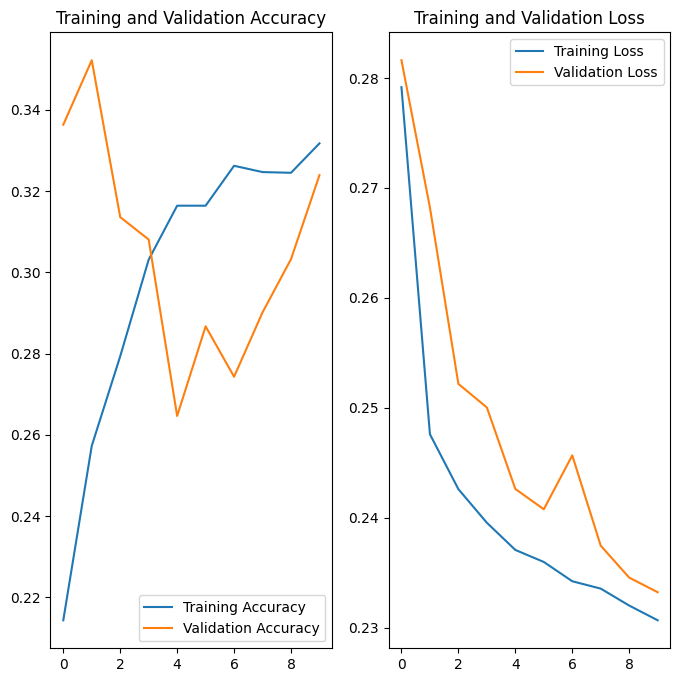

In [70]:
create_plots(history)

In [71]:
loss = model.evaluate(X_test, y_test, verbose=0)
loss

[0.6942799687385559, 0.01033769827336073]

In [25]:
model.save('model-movie-genre.h5')

/Users/stefaniamindoiu/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
np.save('genres', list(genres))
np.load('genres.npy')

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'], dtype='<U11')

In [87]:
def create_model(y_size):
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=images_list_resized[0].shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(y_size, activation='sigmoid'))

    model.compile(optimizer=tf.keras.optimizers.legacy.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [46]:
def create_model_full():
    return create_model(y_train.shape[1])

In [54]:
def do_grid_search(create_model, X_train, y_train):
    # create model
    model = KerasClassifier(model=create_model, verbose=2)
    # define the grid search parameters
    batch_size = [10, 20, 40]
    epochs = [10, 50]
    param_grid = dict(batch_size=batch_size, epochs=epochs)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
    grid_result = grid.fit(X_train, y_train)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

## Train the model on different sizes of the dataset

In [100]:
def train_on_n_images(n, df):
    images_list = []
    for i in range(0, n):
        img = image.load_img('./movies_images/Images/' + df['Id'][i] + '.jpg')
        img = image.img_to_array(img)
        img = img/255
        images_list.append(img)
        
    size = getMinSize(images_list)
    
    df_n = df[0:n]
    
    images_list_resized = [image.smart_resize(img, size) for img in images_list]
    
    X = np.array(images_list_resized)
    y = np.array(df_n.drop(['Id', 'Genre'],axis=1))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
    
    def create_model_n():
        return create_model(y_train.shape[1])
    
    model = create_model_n()
    
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)
    
    model.evaluate(X_test, y_test, verbose=2)

## Train the model on 150 images from this dataset

In [101]:
train_on_n_images(150, df)

Epoch 1/10
2/2 [==============================] - 1s 208ms/step - loss: 0.6631 - accuracy: 0.0917 - val_loss: 0.5973 - val_accuracy: 0.1667
Epoch 2/10
2/2 [==============================] - 0s 156ms/step - loss: 0.4895 - accuracy: 0.1500 - val_loss: 0.3657 - val_accuracy: 0.1667
Epoch 3/10
2/2 [==============================] - 0s 155ms/step - loss: 0.3918 - accuracy: 0.1500 - val_loss: 0.2919 - val_accuracy: 0.1667
Epoch 4/10
2/2 [==============================] - 0s 156ms/step - loss: 0.3356 - accuracy: 0.1333 - val_loss: 0.3043 - val_accuracy: 0.4333
Epoch 5/10
2/2 [==============================] - 0s 155ms/step - loss: 0.3148 - accuracy: 0.1583 - val_loss: 0.3365 - val_accuracy: 0.4333
Epoch 6/10
2/2 [==============================] - 0s 154ms/step - loss: 0.3057 - accuracy: 0.1417 - val_loss: 0.3198 - val_accuracy: 0.2333
Epoch 7/10
2/2 [==============================] - 0s 158ms/step - loss: 0.2919 - accuracy: 0.2417 - val_loss: 0.2797 - val_accuracy: 0.1000
Epoch 8/10
2/2 [====

## Train the model on 1000 images from this dataset

In [103]:
train_on_n_images(1000, df)

KeyboardInterrupt: 

## Train the model on half images from this dataset

In [ ]:
train_on_n_images(df.shape[0] / 2, df)

## Train the model on all images from this dataset

In [ ]:
train_on_n_images(df.shape[0], df)

In [73]:
do_grid_search(create_model_150, X_train_150, y_train_150)

Epoch 1/10
Epoch 1/10
Epoch 1/10
8/8 - 1s - loss: 0.4759 - accuracy: 0.0625 - 959ms/epoch - 120ms/step
Epoch 2/10
8/8 - 1s - loss: 0.4645 - accuracy: 0.0500 - 987ms/epoch - 123ms/step
Epoch 2/10
8/8 - 1s - loss: 0.4647 - accuracy: 0.1000 - 1s/epoch - 128ms/step
Epoch 2/10
8/8 - 1s - loss: 0.2967 - accuracy: 0.2125 - 547ms/epoch - 68ms/step
Epoch 3/10
8/8 - 1s - loss: 0.3039 - accuracy: 0.1875 - 588ms/epoch - 74ms/step
Epoch 3/10
8/8 - 1s - loss: 0.3067 - accuracy: 0.1875 - 556ms/epoch - 70ms/step
Epoch 3/10
8/8 - 1s - loss: 0.2889 - accuracy: 0.2000 - 557ms/epoch - 70ms/step
Epoch 4/10
8/8 - 1s - loss: 0.2679 - accuracy: 0.1375 - 563ms/epoch - 70ms/step
Epoch 4/10
8/8 - 1s - loss: 0.2760 - accuracy: 0.2500 - 552ms/epoch - 69ms/step
Epoch 4/10
8/8 - 1s - loss: 0.2647 - accuracy: 0.2125 - 618ms/epoch - 77ms/step
Epoch 5/10
8/8 - 1s - loss: 0.2625 - accuracy: 0.2375 - 685ms/epoch - 86ms/step
Epoch 5/10
8/8 - 1s - loss: 0.2689 - accuracy: 0.2250 - 683ms/epoch - 85ms/step
Epoch 5/10
Epoch 1

2/2 - 0s - 259ms/epoch - 129ms/step
Epoch 1/10
8/8 - 1s - loss: 0.1843 - accuracy: 0.4625 - 1s/epoch - 156ms/step
Epoch 34/50
8/8 - 1s - loss: 0.2231 - accuracy: 0.3250 - 914ms/epoch - 114ms/step
Epoch 19/50
8/8 - 1s - loss: 0.2416 - accuracy: 0.2750 - 1s/epoch - 140ms/step
Epoch 14/50
4/4 - 1s - loss: 0.6020 - accuracy: 0.0250 - 1s/epoch - 324ms/step
Epoch 2/10
8/8 - 1s - loss: 0.2213 - accuracy: 0.3750 - 724ms/epoch - 91ms/step
Epoch 20/50
8/8 - 1s - loss: 0.1936 - accuracy: 0.4500 - 777ms/epoch - 97ms/step
Epoch 35/50
4/4 - 1s - loss: 0.5576 - accuracy: 0.0500 - 1s/epoch - 305ms/step
Epoch 2/10
8/8 - 1s - loss: 0.2409 - accuracy: 0.2250 - 954ms/epoch - 119ms/step
Epoch 15/50
8/8 - 1s - loss: 0.2116 - accuracy: 0.4375 - 662ms/epoch - 83ms/step
Epoch 21/50
4/4 - 1s - loss: 0.3990 - accuracy: 0.1000 - 1s/epoch - 270ms/step
Epoch 3/10
8/8 - 1s - loss: 0.1735 - accuracy: 0.4625 - 830ms/epoch - 104ms/step
Epoch 36/50
4/4 - 1s - loss: 0.3622 - accuracy: 0.1500 - 929ms/epoch - 232ms/step
Ep

8/8 - 1s - loss: 0.0992 - accuracy: 0.4500 - 915ms/epoch - 114ms/step
Epoch 42/50
4/4 - 0s - 408ms/epoch - 102ms/step
4/4 - 1s - loss: 0.2508 - accuracy: 0.2000 - 892ms/epoch - 223ms/step
Epoch 15/50
4/4 - 2s - loss: 0.2691 - accuracy: 0.2750 - 2s/epoch - 493ms/step
Epoch 8/50
4/4 - 1s - loss: 0.2607 - accuracy: 0.3000 - 1s/epoch - 316ms/step
Epoch 7/50
8/8 - 1s - loss: 0.2058 - accuracy: 0.4250 - 1s/epoch - 153ms/step
Epoch 31/50
8/8 - 1s - loss: 0.0865 - accuracy: 0.6000 - 976ms/epoch - 122ms/step
Epoch 43/50
2/2 - 2s - loss: 0.6558 - accuracy: 0.0625 - 2s/epoch - 868ms/step
Epoch 2/10
4/4 - 1s - loss: 0.2488 - accuracy: 0.2000 - 819ms/epoch - 205ms/step
Epoch 16/50
8/8 - 1s - loss: 0.0836 - accuracy: 0.5750 - 834ms/epoch - 104ms/step
Epoch 44/50
4/4 - 1s - loss: 0.2607 - accuracy: 0.2250 - 1s/epoch - 297ms/step
Epoch 8/50
8/8 - 1s - loss: 0.2051 - accuracy: 0.4000 - 1s/epoch - 156ms/step
Epoch 32/50
4/4 - 1s - loss: 0.2468 - accuracy: 0.2500 - 947ms/epoch - 237ms/step
Epoch 17/50
4/

2/2 - 1s - loss: 0.2801 - accuracy: 0.1500 - 815ms/epoch - 408ms/step
Epoch 8/10
4/4 - 1s - loss: 0.2353 - accuracy: 0.2875 - 1s/epoch - 275ms/step
Epoch 22/50
4/4 - 1s - loss: 0.2269 - accuracy: 0.3875 - 782ms/epoch - 195ms/step
Epoch 36/50
4/4 - 1s - loss: 0.2467 - accuracy: 0.3250 - 1s/epoch - 256ms/step
Epoch 23/50
Epoch 1/50
8/8 - 1s - loss: 0.1289 - accuracy: 0.5625 - 1s/epoch - 173ms/step
Epoch 45/50
2/2 - 1s - loss: 0.2782 - accuracy: 0.2125 - 999ms/epoch - 499ms/step
Epoch 9/10
4/4 - 1s - loss: 0.2265 - accuracy: 0.3625 - 746ms/epoch - 186ms/step
Epoch 37/50
4/4 - 1s - loss: 0.2350 - accuracy: 0.3000 - 948ms/epoch - 237ms/step
Epoch 23/50
4/4 - 1s - loss: 0.2329 - accuracy: 0.2375 - 895ms/epoch - 224ms/step
Epoch 24/50
2/2 - 1s - loss: 0.2778 - accuracy: 0.1875 - 768ms/epoch - 384ms/step
Epoch 10/10
4/4 - 1s - loss: 0.2203 - accuracy: 0.3625 - 789ms/epoch - 197ms/step
Epoch 38/50
2/2 - 1s - loss: 0.6826 - accuracy: 0.0375 - 1s/epoch - 640ms/step
Epoch 2/50
8/8 - 1s - loss: 0.1

2/2 - 1s - loss: 0.2736 - accuracy: 0.2375 - 847ms/epoch - 424ms/step
Epoch 12/50
2/2 - 1s - loss: 0.2502 - accuracy: 0.2375 - 595ms/epoch - 297ms/step
Epoch 23/50
2/2 - 1s - loss: 0.3155 - accuracy: 0.1750 - 716ms/epoch - 358ms/step
Epoch 6/50
4/4 - 1s - loss: 0.1836 - accuracy: 0.4125 - 745ms/epoch - 186ms/step
Epoch 43/50
4/4 - 1s - loss: 0.2001 - accuracy: 0.3375 - 897ms/epoch - 224ms/step
Epoch 40/50
2/2 - 1s - loss: 0.3072 - accuracy: 0.1750 - 600ms/epoch - 300ms/step
Epoch 7/50
2/2 - 1s - loss: 0.2447 - accuracy: 0.2875 - 693ms/epoch - 347ms/step
Epoch 24/50
2/2 - 1s - loss: 0.2640 - accuracy: 0.1875 - 810ms/epoch - 405ms/step
Epoch 13/50
4/4 - 1s - loss: 0.1775 - accuracy: 0.4375 - 689ms/epoch - 172ms/step
Epoch 44/50
2/2 - 1s - loss: 0.2480 - accuracy: 0.2125 - 561ms/epoch - 281ms/step
Epoch 25/50
4/4 - 1s - loss: 0.1935 - accuracy: 0.3750 - 864ms/epoch - 216ms/step
Epoch 41/50
2/2 - 1s - loss: 0.2918 - accuracy: 0.1375 - 679ms/epoch - 339ms/step
Epoch 8/50
2/2 - 1s - loss: 0.

2/2 - 0s - loss: 0.2313 - accuracy: 0.3500 - 403ms/epoch - 202ms/step
1/1 - 0s - 83ms/epoch - 83ms/step
2/2 - 0s - loss: 0.2452 - accuracy: 0.2375 - 416ms/epoch - 208ms/step
Epoch 33/50
2/2 - 0s - loss: 0.2409 - accuracy: 0.2250 - 421ms/epoch - 211ms/step
Epoch 36/50
2/2 - 0s - loss: 0.2411 - accuracy: 0.2125 - 348ms/epoch - 174ms/step
Epoch 34/50
2/2 - 0s - loss: 0.2463 - accuracy: 0.1750 - 353ms/epoch - 177ms/step
Epoch 37/50
2/2 - 0s - loss: 0.2419 - accuracy: 0.2375 - 342ms/epoch - 171ms/step
Epoch 35/50
2/2 - 0s - loss: 0.2363 - accuracy: 0.2625 - 355ms/epoch - 177ms/step
Epoch 38/50
2/2 - 0s - loss: 0.2395 - accuracy: 0.2375 - 291ms/epoch - 146ms/step
Epoch 36/50
2/2 - 0s - loss: 0.2387 - accuracy: 0.2750 - 307ms/epoch - 153ms/step
Epoch 39/50
2/2 - 0s - loss: 0.2413 - accuracy: 0.2500 - 289ms/epoch - 145ms/step
Epoch 37/50
2/2 - 0s - loss: 0.2322 - accuracy: 0.2625 - 303ms/epoch - 152ms/step
Epoch 40/50
2/2 - 0s - loss: 0.2423 - accuracy: 0.2875 - 281ms/epoch - 141ms/step
Epoch 